In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats import shapiro 

In [57]:
DATA_DIR = "../data"
DATA_PROCESSED =  DATA_DIR + "/processed"
PROCESSED_CONT_PATH = f"{DATA_PROCESSED}/cont.csv"
PROCESSED_MET_PATH = f"{DATA_PROCESSED}/meteo.csv"

PROCESSED_CONT_PATH_W_FLAG = f"{DATA_PROCESSED}/cont_flags.csv"
PROCESSED_MET_PATH_W_FLAG = f"{DATA_PROCESSED}/meteo_flags.csv"

PROCESSED_PIV_CONT_PATH = f"{DATA_PROCESSED}/piv_cont.csv"
PROCESSED_PIV_MET_PATH = f"{DATA_PROCESSED}/piv_meteo.csv"

# Contaminantes

## Explorar por que suceden las banderas

DF incluyendo filas de banderas invalidas

In [60]:
cont_w_flags = pd.read_csv(PROCESSED_CONT_PATH_W_FLAG)
print(len(cont_w_flags))
cont_w_flags.head()

65754


date parameter  Value Flag
0  2021-07-01 00:00:00      PM10    NaN    x
1  2021-07-01 00:00:00     PM2.5    NaN    x
2  2021-07-01 00:00:00        O3    NaN    x
3  2021-07-01 00:00:00       SO2    NaN    x
4  2021-07-01 00:00:00       NO2    NaN    e

DF sin incluir filas de banderas invalidas

In [61]:
cont = pd.read_csv(PROCESSED_CONT_PATH)
print(len(cont))
cont.head()

64660


date parameter  Value Flag
0  2021-07-01 00:00:00      PM10    NaN    x
1  2021-07-01 00:00:00     PM2.5    NaN    x
2  2021-07-01 00:00:00        O3    NaN    x
3  2021-07-01 00:00:00       SO2    NaN    x
4  2021-07-01 01:00:00      PM10   21.0

## Exploración II

Explorar df pivoteada

In [25]:
cont = pd.read_csv(PROCESSED_PIV_CONT_PATH)
cont.head()

date    CO   NO2    O3  PM10  PM2.5  SO2
0  2021-07-01 00:00:00   NaN   NaN   NaN   NaN    NaN  NaN
1  2021-07-01 01:00:00  0.49   3.9  22.0  21.0    NaN  2.8
2  2021-07-01 02:00:00  0.51   8.4  17.0  24.0    3.0  3.1
3  2021-07-01 03:00:00  0.50   6.4  19.0  22.0    5.0  3.0
4  2021-07-01 04:00:00  0.51  10.0  14.0  35.0   15.0  3.2

### Valores Faltantes

In [26]:
print(cont.isna().sum())
print(f"Total faltantes: {cont.isna().sum().sum()}")

date       0
CO       209
NO2      273
O3       278
PM10     415
PM2.5    463
SO2      469
dtype: int64
Total faltantes: 2107


In [27]:
# N. filas con valores faltantes
tmp = cont.isna().sum(axis=1).astype('bool').sum() 
print(f"Filas con valores faltantes: {tmp}")
# Proporción de filas con valores faltantes
tmp / len(cont)

Filas con valores faltantes: 1013


0.09243544118988958

### Exploración

* No existen valores negativos, i.e. No hay errores por ese lado.

In [28]:
cont.describe().loc['min']

CO       0.24
NO2      0.30
O3       1.00
PM10     5.00
PM2.5    2.00
SO2      1.50
Name: min, dtype: float64

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cont_cols = cont.select_dtypes(include=numerics).columns
cont_units = {'PM10':'µg/m^3', 'PM2.5': 'µg/m^3', 'O3':'ppb', 'SO2':'ppb', 'NO2':'ppb', 'CO':'ppm', 'NO':'ppb'}
rows, cols= [1,1,1,2,2,2], [1,2,3,1,2,3]
fig = make_subplots(rows=2, cols=3, subplot_titles=cont_cols)

for i, col in enumerate(cont_cols):
    fig.add_trace(go.Box(x = [col]*len(cont), y = cont[col], name=cont_units[col]),
                    row=rows[i], col=cols[i])

fig.update_layout(title='Contaminantes', height=600, width=900)
fig.show()

In [30]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cont_cols = cont.select_dtypes(include=numerics).columns
cont_units = {'PM10':'µg/m^3', 'PM2.5': 'µg/m^3', 'O3':'ppb', 'SO2':'ppb', 'NO2':'ppb', 'CO':'ppm', 'NO':'ppb'}
rows, cols= [1,1,2,2,3,3], [1,2,1,2,1,2]
fig = make_subplots(rows=3, cols=2, subplot_titles=cont_cols)

for i, col in enumerate(cont_cols):

    fig.add_trace(go.Histogram(x = cont[col], name=cont_units[col]),
                    row=rows[i], col=cols[i])

fig.update_layout(title='Contaminantes', height=600, width=900)
fig.show()

In [31]:
log_cont = np.log(cont[cont_cols])

### Distribución

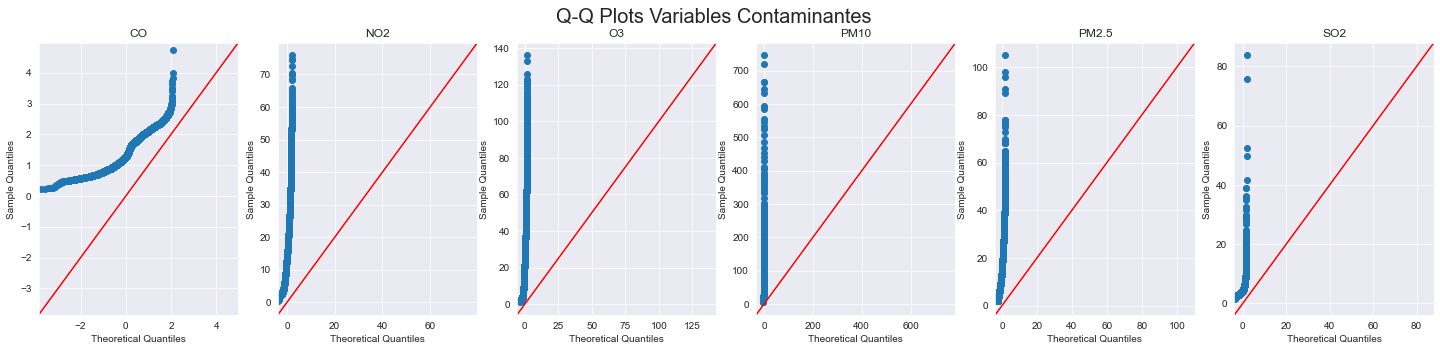

In [32]:
import statsmodels.api as sm

fig, axs = plt.subplots(1, 6, figsize=(25,5))
fig.suptitle('Q-Q Plots Variables Contaminantes', fontsize=20)

for i, col in enumerate(cont_cols):
    sm.qqplot(cont[col], line='45', ax=axs[i])
    axs[i].set_title(col)

### Correlación

In [33]:
fig = px.imshow(cont.corr(method='spearman').round(2), color_continuous_scale='ice', title='Mapa Correlación', text_auto=True)

fig.layout.height = 500
fig.layout.width = 500

fig.show()

# Meteorologica

In [34]:
met = pd.read_csv(PROCESSED_PIV_MET_PATH)
met.head()

date        PRS  RAINF    RH   SR   TOUT   WDR    WSR
0  2021-07-01 00:00:00        NaN    NaN   NaN  0.0    NaN   NaN    NaN
1  2021-07-01 01:00:00  714.50000    0.0  77.0  0.0  22.32  79.0  109.7
2  2021-07-01 02:00:00  714.20001    0.0  77.0  0.0  22.50  74.0  109.7
3  2021-07-01 03:00:00  714.20001    0.0  76.0  0.0  22.58  69.0  106.9
4  2021-07-01 04:00:00  714.20001    0.0  79.0  0.0  22.24  81.0  118.4

### Faltantes

In [35]:
print(met.isna().sum())
print(f"Total faltantes: {met.isna().sum().sum()}")

date       0
PRS      214
RAINF    211
RH       233
SR        16
TOUT     214
WDR      704
WSR      268
dtype: int64
Total faltantes: 1860


In [36]:
# N. filas con valores faltantes
tmp = met.isna().sum(axis=1).astype('bool').sum() 
print(f"Filas con valores faltantes: {tmp}")
# Proporción de filas con valores faltantes
tmp / len(met)

Filas con valores faltantes: 789


0.07199562003832466

### Exploración

In [37]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
met_cols = met.select_dtypes(include=numerics).columns
met_units = {'TOUT':'°C', 'RAINF':'mm/Hr', 'RH':'%', 'SR':'kW/m^2', 'PRS':'mm/Hg', 'WSR':'Km/hr', 'WDR': '°' }
rows, cols= [1,1,1,1, 2,2,2,2], [1,2,3,4,1,2,3]
fig = make_subplots(rows=2, cols=4, subplot_titles=met_cols)

for i, col in enumerate(met_cols):
    fig.add_trace(go.Box(x = [col]*len(cont), y = met[col], name=met_units[col]),
                    row=rows[i], col=cols[i])

fig.update_layout(title='Variables Meterológicas', height=600, width=900)

fig.show()

### Correlación

In [38]:
fig = px.imshow(met.corr(method='spearman').round(2), color_continuous_scale='ice', title='Mapa Correlación', text_auto=True)

fig.layout.height = 500
fig.layout.width = 500

fig.show()

# Ambas

In [39]:
merged = pd.merge(cont, met)
merged.head()

date    CO   NO2    O3  PM10  PM2.5  SO2        PRS  RAINF  \
0  2021-07-01 00:00:00   NaN   NaN   NaN   NaN    NaN  NaN        NaN    NaN   
1  2021-07-01 01:00:00  0.49   3.9  22.0  21.0    NaN  2.8  714.50000    0.0   
2  2021-07-01 02:00:00  0.51   8.4  17.0  24.0    3.0  3.1  714.20001    0.0   
3  2021-07-01 03:00:00  0.50   6.4  19.0  22.0    5.0  3.0  714.20001    0.0   
4  2021-07-01 04:00:00  0.51  10.0  14.0  35.0   15.0  3.2  714.20001    0.0   

     RH   SR   TOUT   WDR    WSR  
0   NaN  0.0    NaN   NaN    NaN  
1  77.0  0.0  22.32  79.0  109.7  
2  77.0  0.0  22.50  74.0  109.7  
3  76.0  0.0  22.58  69.0  106.9  
4  79.0  0.0  22.24  81.0  118.4

In [40]:
fig = px.imshow(merged.corr(method='spearman').iloc[0:6, 6:].round(2), color_continuous_scale='ice', title='Mapa Correlación', text_auto=True)

fig.layout.height = 500
fig.layout.width = 500

fig.show()

* Número de filas faltantes en contaminantes: 1013
* Número de filas faltantes en meteorologicas: 789
* Número de filas con faltantes en ambas: 1467
    * Para la mayoria, no es la misma hora que tiene faltantes en contaminantes y meteorologicas

In [41]:
merged.isna().sum(axis=1).astype('bool').sum()

1467

In [42]:
cont_binary = merged[cont_cols].notnull().astype('int')
cont_binary_met = pd.concat([cont_binary, met], axis = 1)
cont_binary_met

CO  NO2  O3  PM10  PM2.5  SO2                 date        PRS  RAINF  \
0       0    0   0     0      0    0  2021-07-01 00:00:00        NaN    NaN   
1       1    1   1     1      0    1  2021-07-01 01:00:00  714.50000    0.0   
2       1    1   1     1      1    1  2021-07-01 02:00:00  714.20001    0.0   
3       1    1   1     1      1    1  2021-07-01 03:00:00  714.20001    0.0   
4       1    1   1     1      1    1  2021-07-01 04:00:00  714.20001    0.0   
...    ..  ...  ..   ...    ...  ...                  ...        ...    ...   
10954   1    1   1     1      1    1  2022-09-30 19:00:00  713.40002    0.0   
10955   1    1   1     1      1    1  2022-09-30 20:00:00  713.50000    0.0   
10956   1    1   1     1      1    1  2022-09-30 21:00:00  713.59998    0.0   
10957   1    1   1     1      1    1  2022-09-30 22:00:00  713.70001    0.0   
10958   1    1   1     1      1    1  2022-09-30 23:00:00  713.70001    0.0   

         RH     SR   TOUT    WDR    WSR  
0       NaN  0.000    NaN    NaN    NaN  
1      77.0  0.000  22.32   79.0  109.7  
2      77.0  0.000  22.50   74.0  109.7  
3      76.0  0.000  22.58   69.0  106.9  
4      79.0  0.000  22.24   81.0  118.4  
...     ...    ...    ...    ...    ...  
10954  31.0  0.002  26.35  106.0   14.0  
10955  33.0  0.000  25.66  104.0   12.7  
10956  33.0  0.000  25.26  103.0   10.3  
10957  36.0  0.000  24.42  117.0    7.9  
10958  37.0  0.000  23.91  118.0    8.1  

[10959 rows x 14 columns]

In [43]:
cont_binary_met.corr()

CO       NO2        O3      PM10     PM2.5       SO2       PRS  \
CO     1.000000  0.872359  0.864276  0.702826  0.663881  0.659432       NaN   
NO2    0.872359  1.000000  0.759876  0.615489  0.580562  0.602604 -0.014684   
O3     0.864276  0.759876  1.000000  0.609496  0.583498  0.573748 -0.058366   
PM10   0.702826  0.615489  0.609496  1.000000  0.476414  0.470593 -0.101637   
PM2.5  0.663881  0.580562  0.583498  0.476414  1.000000  0.462118 -0.017756   
SO2    0.659432  0.602604  0.573748  0.470593  0.462118  1.000000 -0.008642   
PRS         NaN -0.014684 -0.058366 -0.101637 -0.017756 -0.008642  1.000000   
RAINF       NaN  0.001592  0.004700 -0.008632 -0.025865  0.007194  0.044022   
RH          NaN -0.022621 -0.094922 -0.016789 -0.018347 -0.072813  0.184029   
SR     0.094935  0.104237  0.107037  0.072105  0.098304  0.122002 -0.072371   
TOUT        NaN -0.017765  0.131330  0.059740 -0.006489 -0.022357 -0.612795   
WDR         NaN  0.002936 -0.044277 -0.029383  0.016019  0.022702  0.006923   
WSR         NaN -0.030671  0.024776 -0.094993 -0.005511 -0.092114  0.002550   

          RAINF        RH        SR      TOUT       WDR       WSR  
CO          NaN       NaN  0.094935       NaN       NaN       NaN  
NO2    0.001592 -0.022621  0.104237 -0.017765  0.002936 -0.030671  
O3     0.004700 -0.094922  0.107037  0.131330 -0.044277  0.024776  
PM10  -0.008632 -0.016789  0.072105  0.059740 -0.029383 -0.094993  
PM2.5 -0.025865 -0.018347  0.098304 -0.006489  0.016019 -0.005511  
SO2    0.007194 -0.072813  0.122002 -0.022357  0.022702 -0.092114  
PRS    0.044022  0.184029 -0.072371 -0.612795  0.006923  0.002550  
RAINF  1.000000  0.098611 -0.044519 -0.024454  0.013841  0.005070  
RH     0.098611  1.000000 -0.389013 -0.373635  0.045449  0.222806  
SR    -0.044519 -0.389013  1.000000  0.416196 -0.267351 -0.063288  
TOUT  -0.024454 -0.373635  0.416196  1.000000 -0.316886  0.104962  
WDR    0.013841  0.045449 -0.267351 -0.316886  1.000000 -0.031372  
WSR    0.005070  0.222806 -0.063288  0.104962 -0.031372  1.000000

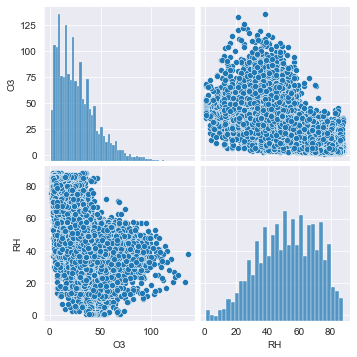

In [44]:
sns.pairplot(merged[['O3', 'RH']])